# Exploratory Data Analysis
---

## 0. Constants

In [125]:
CLIENT_DATA_PATH = "../data/raw/client_data.csv"
PRICE_DATA_PATH = "../data/raw/price_data.csv"
FINAL_DF_PATH = "../data/processed/eda_data.pkl"

---
## 1. Imports

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

pd.options.display.max_columns = 50
%matplotlib inline

sns.set(color_codes=True)

In [2]:
client_df = pd.read_csv(CLIENT_DATA_PATH)
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [3]:
price_df = pd.read_csv(PRICE_DATA_PATH)
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [4]:
print(f"Client DF shape: {client_df.shape}")
print(f"Price DF shape: {price_df.shape}")

Client DF shape: (14606, 26)
Price DF shape: (193002, 8)


## 2. Descriptive Statistics

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [7]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [8]:
client_df.describe(include = "object")

,id,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,has_gas,origin_up
count,14606,14606,14606,14606,14606,14606,14606,14606
unique,14606,8,1796,368,2129,386,2,6
top,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,2009-08-01,2016-02-01,2015-11-01,2015-06-23,f,lxidpiddsbxsbosboudacockeimpuepw
freq,1,6754,95,145,721,587,11955,7097


In [9]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


### Missing Values Check

In [10]:
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [11]:
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

### Duplicate Values Check

In [12]:
client_df.duplicated().sum()

0

In [13]:
price_df.duplicated().sum()

0

### Unique Values Check

In [14]:
for col in client_df.select_dtypes(include="object").columns:
    if "date" in col:
        continue
    else:
        print(f"----{col}----\n")
        print(client_df[[col]].value_counts(), "\n")

----id----

id                              
0002203ffbb812588b632b9e628cc38d    1
ab250252dfaded1c9a54834f9c829b43    1
ab32c3a8d93c88b485499566526cb34d    1
ab3392ec2bfd3605624f31d3c6828c21    1
ab346731fef5aa291919ea43e45af5a7    1
                                   ..
55091aace7bd0fadd194f46cb4886fea    1
550b8d2f9c298abd8f05fca3bc1a13c4    1
5514b18508f378a39f41657554aa72e3    1
551cb1b1faf72259c2c182dedec12c98    1
ffff7fa066f1fb305ae285bb03bf325a    1
Length: 14606, dtype: int64 

----channel_sales----

channel_sales                   
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
dtype: int64 

----has_gas----

has_gas
f          11955
t           2651
dtype: int64 

----origin_up----

origin_up      

---
## 3. Data Visualizations

In [15]:
def plot_stacked(df, col, title, rot):
    ax = df.plot(kind="bar",
                   stacked= True,
                   title=title,
                   rot=rot,
                   figsize=(10, 8))
    
    plt.legend(["Retention", "Churn"], loc="lower right")
    plt.ylabel("% of Clients Retention")
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height()*100)
        if percentage!='0.0%':
            x = p.get_x() + p.get_width()/2
            y = 1 - p.get_height()/1.8
            ax.annotate(text=percentage, xy=(x, y), ha='center')
    ax.margins(y=0.1)

### Churn Status 

In [16]:
churn_df = client_df["churn"].value_counts(normalize=True).to_frame().T
churn_df

,0,1
churn,0.902848,0.097152


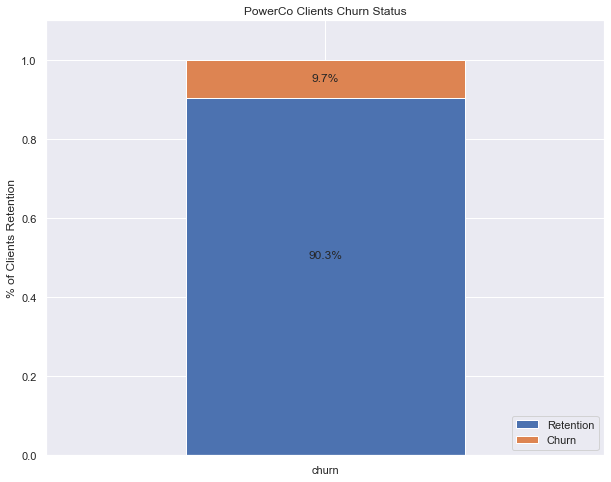

In [17]:
plot_stacked(churn_df, "churn", "PowerCo Clients Churn Status", rot=0)

>**Takeaway 1: Less than 10% of clients have churned.**

### Sales Channel

Text(0.5, 1.0, 'Distribution of Sales Channels')

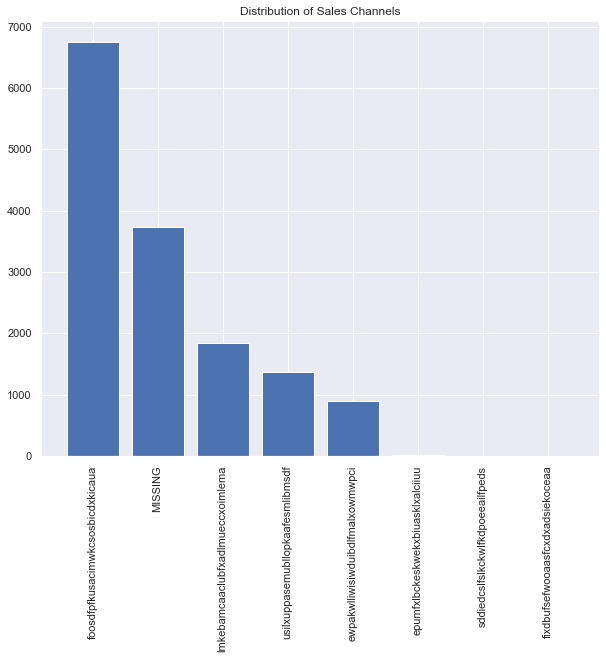

In [18]:
plt.figure(figsize=(10,8))
plt.bar(client_df["channel_sales"].unique(), client_df["channel_sales"].value_counts())
plt.xticks(rotation=90)
plt.title("Distribution of Sales Channels")

In [19]:
channel_chrun_df = client_df.groupby(["channel_sales", "churn"]).count()["id"].unstack(level=1)
channel_chrun_df = channel_chrun_df.div(channel_chrun_df.sum(axis=1), axis=0).fillna(0)
channel_chrun_df

churn,0,1
channel_sales,,
MISSING,0.924027,0.075973
epumfxlbckeskwekxbiuasklxalciiuu,1.000000,0.000000
ewpakwlliwisiwduibdlfmalxowmwpci,0.916013,0.083987
fixdbufsefwooaasfcxdxadsiekoceaa,1.000000,0.000000
foosdfpfkusacimwkcsosbicdxkicaua,0.878590,0.121410
lmkebamcaaclubfxadlmueccxoimlema,0.944113,0.055887
sddiedcslfslkckwlfkdpoeeailfpeds,1.000000,0.000000
usilxuppasemubllopkaafesmlibmsdf,0.899636,0.100364


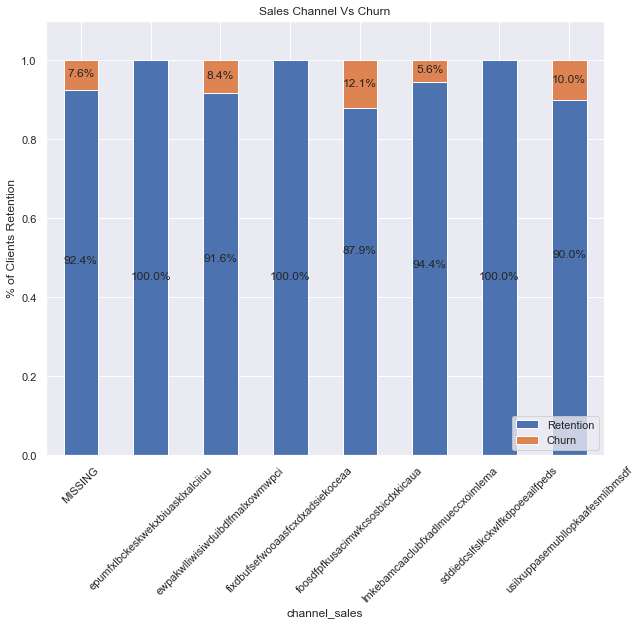

In [20]:
plot_stacked(channel_chrun_df, "churn", "Sales Channel Vs Churn", rot=45)

>**Takeaway 1: Sales channels "foosdfpfkusacimwkcsosbicdxkicaua" & "Missing" account for the majority of customer attraction.**

>**Takeaway 2: Although Sales channel "foosdfpfkusacimwkcsosbicdxkicaua" attraction is high, customers of this channel churned the most.**

### Contract Type

In [21]:
contract_df = client_df.groupby(["has_gas", "churn"]).size().unstack(level=1)
contract_df = contract_df.div(contract_df.sum(axis=1), axis=0)
contract_df

churn,0,1
has_gas,,
f,0.899456,0.100544
t,0.918144,0.081856


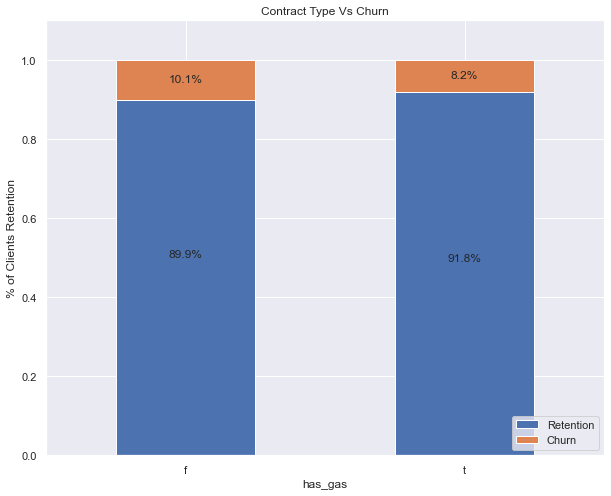

In [22]:
plot_stacked(contract_df, "churn", "Contract Type Vs Churn", rot=0)

>**Takeaway 1: Gas subscription doesnt seem to affect the churn much, but those who subscribed to gas are less to churn.**

### Subscribed Power 

<AxesSubplot:xlabel='pow_max', ylabel='Count'>

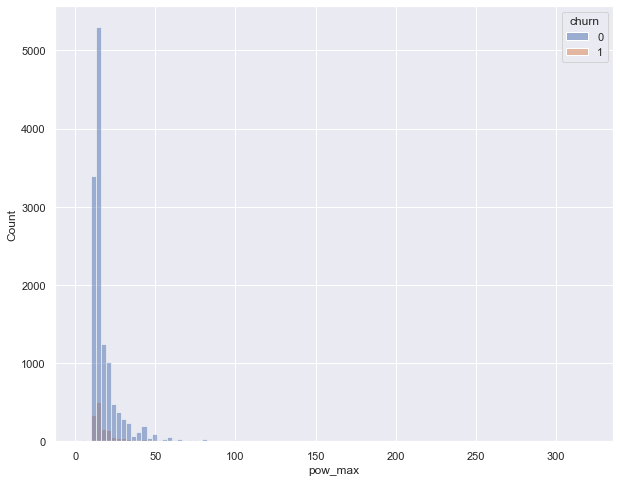

In [23]:
plt.figure(figsize=(10,8))
sns.histplot(data=client_df, x="pow_max", bins=100, hue='churn')

### Power Consumption

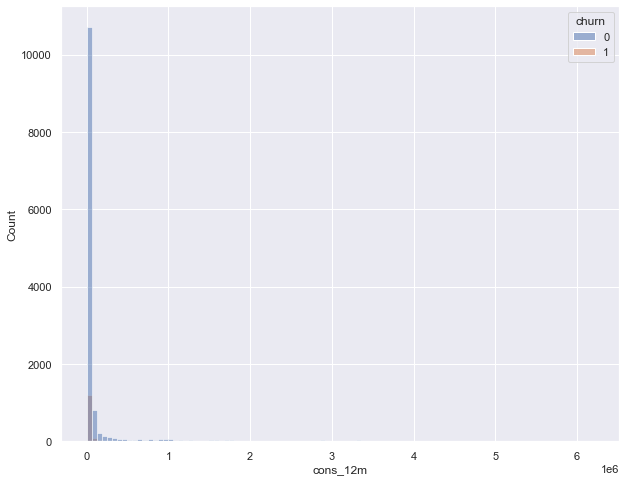

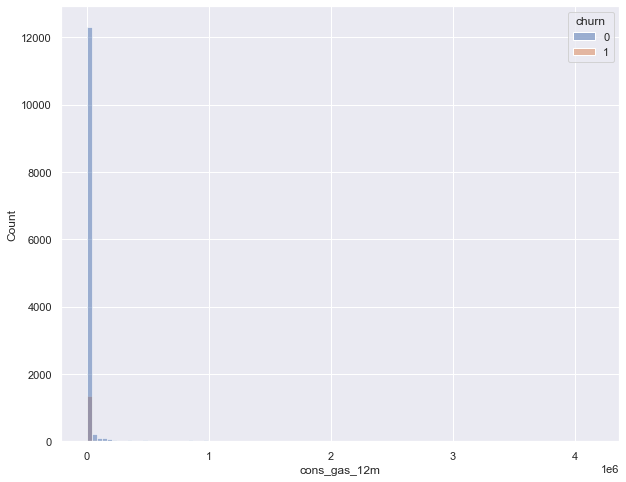

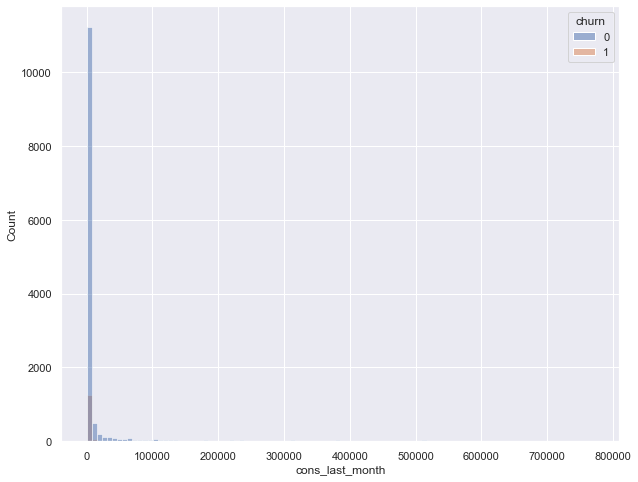

In [24]:
for col in ["cons_12m", "cons_gas_12m", "cons_last_month"]:
    plt.figure(figsize=(10,8))
    sns.histplot(data=client_df, x=col, bins=100, hue='churn')

### Antiquity of the client

<AxesSubplot:title={'center':'Client Antiquity Distribution'}, xlabel='num_years_antig', ylabel='Count'>

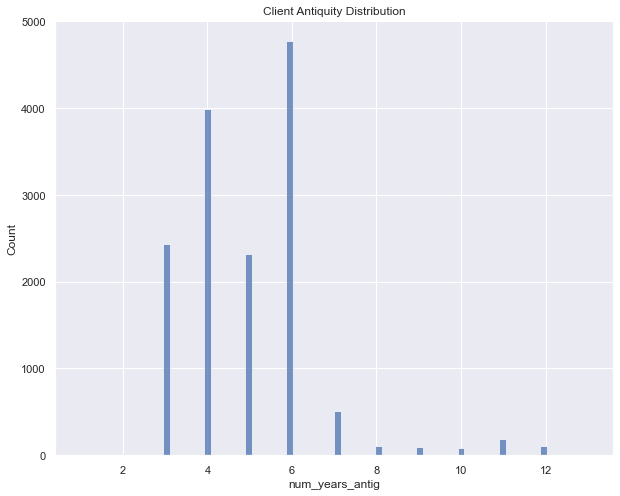

In [50]:
plt.figure(figsize=(10,8))
plt.title("Client Antiquity Distribution")
sns.histplot(data=client_df, x="num_years_antig")

In [25]:
antiquity_df = client_df.groupby(["num_years_antig", "churn"]).size().unstack(level=1)
antiquity_df= antiquity_df.div(antiquity_df.sum(axis=1), axis=0)
antiquity_df

churn,0,1
num_years_antig,,
1,1.000000,NaN
2,0.727273,0.272727
3,0.864776,0.135224
4,0.881467,0.118533
5,0.913681,0.086319
6,0.928916,0.071084
7,0.917485,0.082515
8,0.951456,0.048544
9,0.989130,0.010870


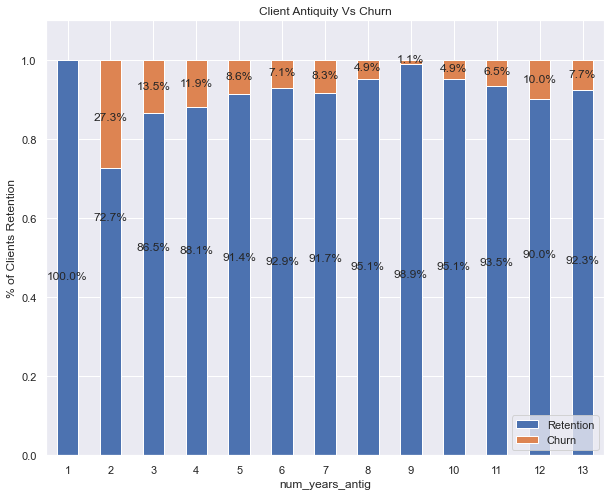

In [26]:
plot_stacked(antiquity_df, "churn", "Client Antiquity Vs Churn", rot=0)

>**Takeaway 1: It seems that newer customers tend to churn more than those who stayed for 3 years up to 9 years.**

>**Takeaway 2: Churn increases for customers who spend more than 10 years with the provider.**

### Contract Activation Date

In [39]:
client_df["contract_start_year"] = pd.to_datetime(client_df.date_activ).dt.year
client_df["contract_start_year"].head()

0    2013
1    2009
2    2010
3    2010
4    2010
Name: contract_start_year, dtype: int64

In [40]:
client_df["contract_start_year"].min(), client_df["contract_start_year"].max()

(2003, 2014)

<AxesSubplot:title={'center':'Client Contract Activation Date Distribution'}, xlabel='contract_start_year', ylabel='Count'>

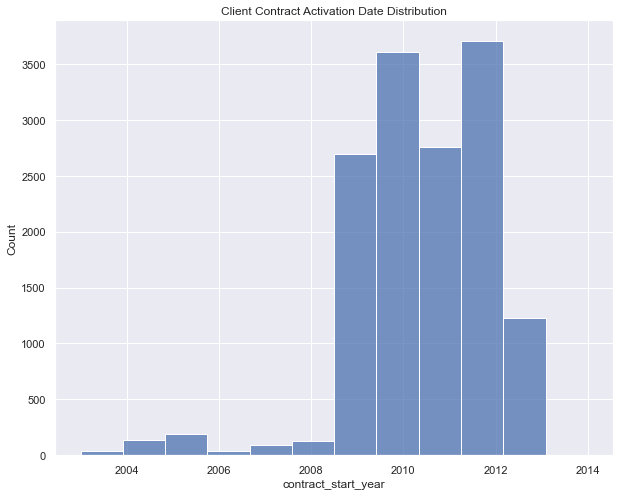

In [44]:
plt.figure(figsize=(10,8))
plt.title("Client Contract Activation Date Distribution")
sns.histplot(data=client_df, x="contract_start_year", bins=12)

In [46]:
active_df = client_df.groupby(["contract_start_year", "churn"]).size().unstack(level=1)
active_df = active_df.div(active_df.sum(axis=1), axis=0)
active_df

churn,0,1
contract_start_year,,
2003,0.897436,0.102564
2004,0.912409,0.087591
2005,0.947090,0.052910
2006,0.944444,0.055556
2007,0.978947,0.021053
2008,0.951613,0.048387
2009,0.922305,0.077695
2010,0.928235,0.071765
2011,0.901378,0.098622


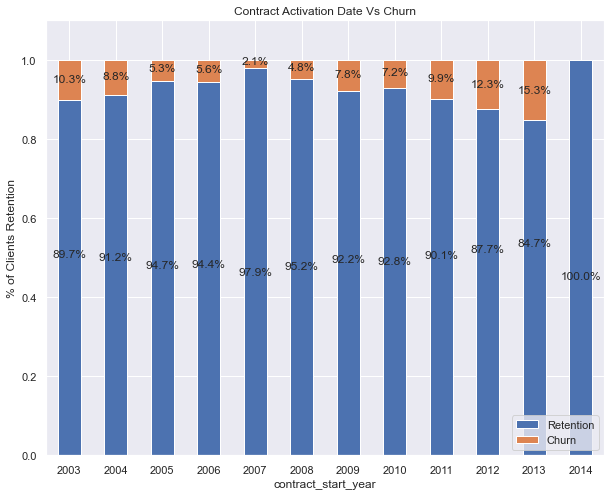

In [49]:
plot_stacked(active_df, "churn", "Contract Activation Date Vs Churn", rot=0)

>**Takeaway 1: It seems that very new & very old customers tend to churn more.**

###  Current discount forecast

<AxesSubplot:title={'center':'Forecasted Energy Distribution Distribution'}, xlabel='forecast_discount_energy', ylabel='Count'>

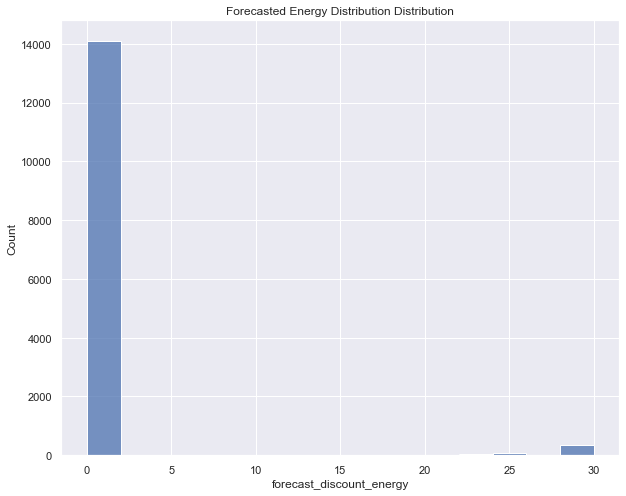

In [53]:
plt.figure(figsize=(10,8))
plt.title("Forecasted Energy Distribution Distribution")
sns.histplot(data=client_df, x="forecast_discount_energy")

>**Takeaway 1: Almost all customers have a forecast of 0$ discount.**

---
## 4. Hypothesis Testing of Price Sensitivity 

In [54]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [72]:
price_cols = price_df.columns.tolist()
price_cols.remove("id")
price_cols.remove("price_date")

In [92]:
agg_funcs = ["min", "max"]
price_agg_df = price_df.groupby("id")[price_cols].agg({col: agg_funcs for col in price_cols})
price_agg_df

price_off_peak_var           price_peak_var  \
                                                min       max            min   
id                                                                             
0002203ffbb812588b632b9e628cc38d           0.119906  0.128067       0.101673   
0004351ebdd665e6ee664792efc4fd13           0.143943  0.148405       0.000000   
0010bcc39e42b3c2131ed2ce55246e3c           0.150837  0.205742       0.000000   
0010ee3855fdea87602a5b7aba8e42de           0.113068  0.123086       0.095385   
00114d74e963e47177db89bc70108537           0.145440  0.149902       0.000000   
...                                             ...       ...            ...   
ffef185810e44254c3a4c6395e6b4d8a           0.112488  0.165037       0.094804   
fffac626da707b1b5ab11e8431a4d0a2           0.144363  0.148825       0.000000   
fffc0cacd305dd51f316424bbb08d1bd           0.151399  0.159560       0.126871   
fffe4f5646aa39c7f97f95ae2679ce64           0.118175  0.127566       0.100491   
ffff7fa066f1fb305ae285bb03bf325a           0.119916  0.129444       0.102232   

                                           price_mid_peak_var            \
                                       max                min       max   
id                                                                        
0002203ffbb812588b632b9e628cc38d  0.105842           0.070232  0.073773   
0004351ebdd665e6ee664792efc4fd13  0.000000           0.000000  0.000000   
0010bcc39e42b3c2131ed2ce55246e3c  0.000000           0.000000  0.000000   
0010ee3855fdea87602a5b7aba8e42de  0.100505           0.068646  0.069463   
00114d74e963e47177db89bc70108537  0.000000           0.000000  0.000000   
...                                    ...                ...       ...   
ffef185810e44254c3a4c6395e6b4d8a  0.135909           0.068829  0.093881   
fffac626da707b1b5ab11e8431a4d0a2  0.000000           0.000000  0.000000   
fffc0cacd305dd51f316424bbb08d1bd  0.132895           0.091394  0.101037   
fffe4f5646aa39c7f97f95ae2679ce64  0.105428           0.073433  0.074516   
ffff7fa066f1fb305ae285bb03bf325a  0.106863           0.075004  0.076311   

                                 price_off_peak_fix            price_peak_fix  \
                                                min        max            min   
id                                                                              
0002203ffbb812588b632b9e628cc38d          40.565969  40.728885      24.339581   
0004351ebdd665e6ee664792efc4fd13          44.266931  44.444710       0.000000   
0010bcc39e42b3c2131ed2ce55246e3c          44.444710  45.944710       0.000000   
0010ee3855fdea87602a5b7aba8e42de          40.565969  40.728885      24.339578   
00114d74e963e47177db89bc70108537          44.266930  44.266931       0.000000   
...                                             ...        ...            ...   
ffef185810e44254c3a4c6395e6b4d8a          40.728885  41.063970      24.437330   
fffac626da707b1b5ab11e8431a4d0a2          44.266930  44.444710       0.000000   
fffc0cacd305dd51f316424bbb08d1bd          41.063970  41.228885      24.837581   
fffe4f5646aa39c7f97f95ae2679ce64          40.565969  40.728885      24.339578   
ffff7fa066f1fb305ae285bb03bf325a          40.565969  40.728885      24.339578   

                                            price_mid_peak_fix             
                                        max                min        max  
id                                                                         
0002203ffbb812588b632b9e628cc38d  24.437330          16.226389  16.291555  
0004351ebdd665e6ee664792efc4fd13   0.000000           0.000000   0.000000  
0010bcc39e42b3c2131ed2ce55246e3c   0.000000           0.000000   0.000000  
0010ee3855fdea87602a5b7aba8e42de  24.437330          16.226383  16.291555  
00114d74e963e47177db89bc70108537   0.000000           0.000000   0.000000  
...                                     ...                ...        ...  
ffef185810e44254c3a4c6395e6b4d8a  24.83758

In [95]:
price_agg_df.columns = ["_".join(col).strip() for col in price_agg_df.columns.values]

In [97]:
price_agg_df.head(2)

,price_off_peak_var_min,price_off_peak_var_max,price_peak_var_min,price_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_max,price_off_peak_fix_min,price_off_peak_fix_max,price_peak_fix_min,price_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_max
id,,,,,,,,,,,,
0002203ffbb812588b632b9e628cc38d,0.119906,0.128067,0.101673,0.105842,0.070232,0.073773,40.565969,40.728885,24.339581,24.43733,16.226389,16.291555
0004351ebdd665e6ee664792efc4fd13,0.143943,0.148405,0.000000,0.000000,0.000000,0.000000,44.266931,44.444710,0.000000,0.00000,0.000000,0.000000


In [101]:
price_agg_cols = price_agg_df.columns
for col in price_cols:
    price_agg_df[f"{col}_diff"] = price_agg_df[f"{col}_max"] - price_agg_df[f"{col}_min"]

price_agg_df.head()

,price_off_peak_var_min,price_off_peak_var_max,price_peak_var_min,price_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_max,price_off_peak_fix_min,price_off_peak_fix_max,price_peak_fix_min,price_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_max,price_off_peak_var_diff,price_peak_var_diff,price_mid_peak_var_diff,price_off_peak_fix_diff,price_peak_fix_diff,price_mid_peak_fix_diff
id,,,,,,,,,,,,,,,,,,
0002203ffbb812588b632b9e628cc38d,0.119906,0.128067,0.101673,0.105842,0.070232,0.073773,40.565969,40.728885,24.339581,24.43733,16.226389,16.291555,0.008161,0.004169,0.003541,0.162916,0.097749,0.065166
0004351ebdd665e6ee664792efc4fd13,0.143943,0.148405,0.000000,0.000000,0.000000,0.000000,44.266931,44.444710,0.000000,0.00000,0.000000,0.000000,0.004462,0.000000,0.000000,0.177779,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.150837,0.205742,0.000000,0.000000,0.000000,0.000000,44.444710,45.944710,0.000000,0.00000,0.000000,0.000000,0.054905,0.000000,0.000000,1.500000,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.113068,0.123086,0.095385,0.100505,0.068646,0.069463,40.565969,40.728885,24.339578,24.43733,16.226383,16.291555,0.010018,0.005120,0.000817,0.162916,0.097752,0.065172
00114d74e963e47177db89bc70108537,0.145440,0.149902,0.000000,0.000000,0.000000,0.000000,44.266930,44.266931,0.000000,0.00000,0.000000,0.000000,0.004462,0.000000,0.000000,0.000001,0.000000,0.000000


In [103]:
price_final_df = pd.merge(price_agg_df, client_df[['id', 'churn']], on='id')
price_final_df.head()

,id,price_off_peak_var_min,price_off_peak_var_max,price_peak_var_min,price_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_max,price_off_peak_fix_min,price_off_peak_fix_max,price_peak_fix_min,price_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_max,price_off_peak_var_diff,price_peak_var_diff,price_mid_peak_var_diff,price_off_peak_fix_diff,price_peak_fix_diff,price_mid_peak_fix_diff,churn
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.128067,0.101673,0.105842,0.070232,0.073773,40.565969,40.728885,24.339581,24.43733,16.226389,16.291555,0.008161,0.004169,0.003541,0.162916,0.097749,0.065166,0
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.148405,0.000000,0.000000,0.000000,0.000000,44.266931,44.444710,0.000000,0.00000,0.000000,0.000000,0.004462,0.000000,0.000000,0.177779,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.150837,0.205742,0.000000,0.000000,0.000000,0.000000,44.444710,45.944710,0.000000,0.00000,0.000000,0.000000,0.054905,0.000000,0.000000,1.500000,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.145440,0.149902,0.000000,0.000000,0.000000,0.000000,44.266930,44.266931,0.000000,0.00000,0.000000,0.000000,0.004462,0.000000,0.000000,0.000001,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.121647,0.129808,0.103413,0.107582,0.072089,0.075514,40.728885,40.728885,24.437330,24.43733,16.291555,16.291555,0.008161,0.004169,0.003425,0.000000,0.000000,0.000000,0


In [117]:
corr = price_final_df.corr()

<AxesSubplot:>

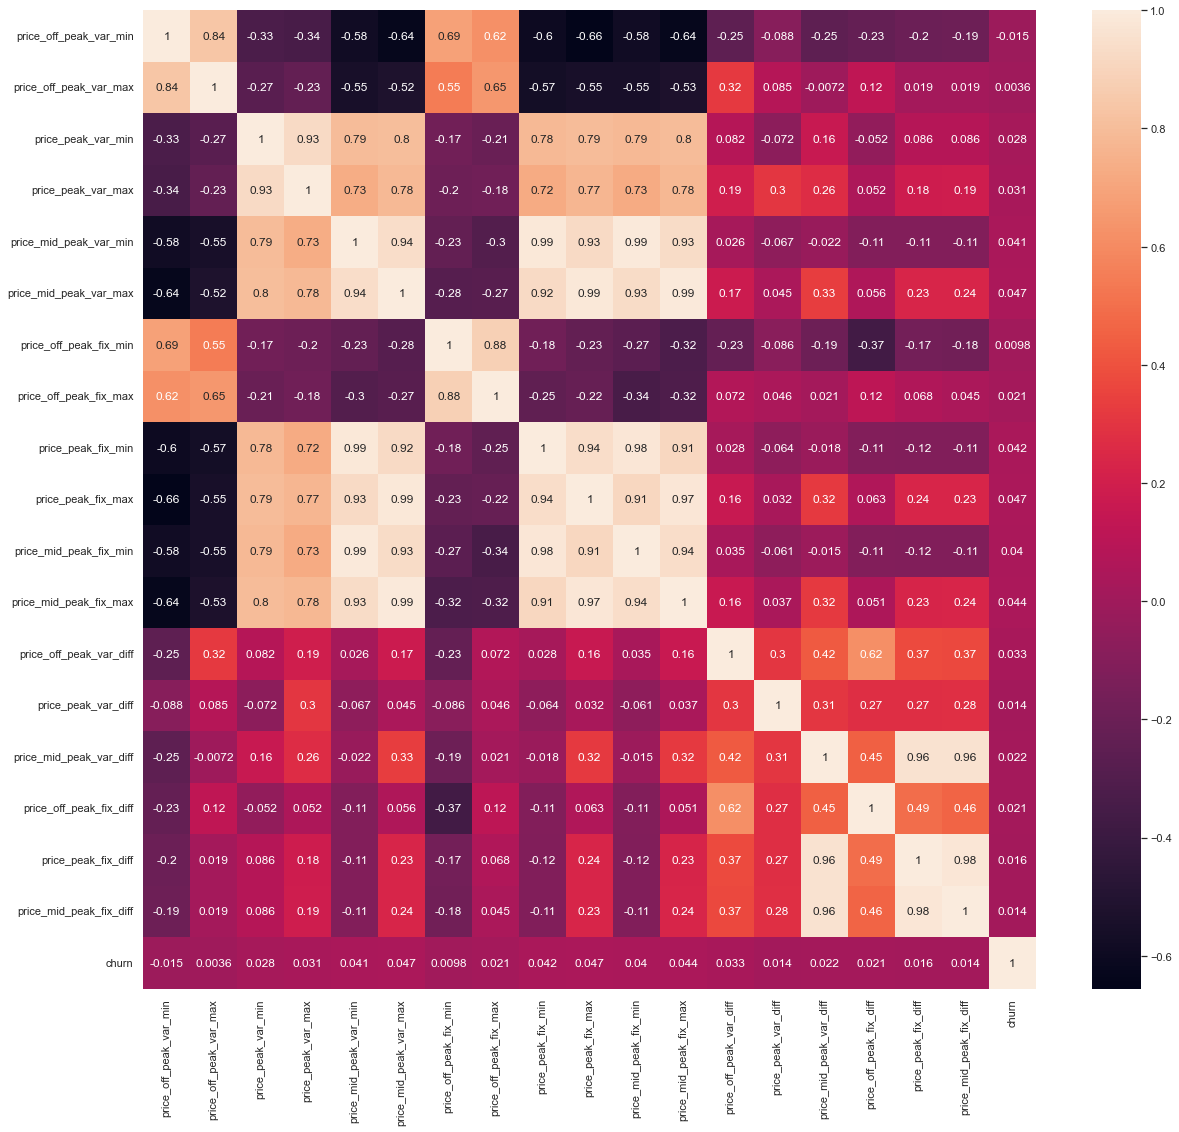

In [121]:
plt.figure(figsize=(20,18))
sns.heatmap(corr, annot=True)

>**Takeaway 1: Churn correlation with prices is very low. This indicates that change in prices didnt affect churn, hence, we can conclude customers were not sensitive to prices.**

---
## 5. Saving Final Data

In [123]:
final_df = pd.merge(client_df.drop(columns=['churn']), price_final_df, on='id')

In [124]:
final_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,contract_start_year,price_off_peak_var_min,price_off_peak_var_max,price_peak_var_min,price_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_max,price_off_peak_fix_min,price_off_peak_fix_max,price_peak_fix_min,price_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_max,price_off_peak_var_diff,price_peak_var_diff,price_mid_peak_var_diff,price_off_peak_fix_diff,price_peak_fix_diff,price_mid_peak_fix_diff,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,2013,0.117479,0.146033,0.085483,0.103963,0.000000,0.073873,40.565969,44.266930,0.000000,24.43733,0.000000,16.291555,0.028554,0.018480,0.073873,3.700961,24.437330,16.291555,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,2009,0.146033,0.151367,0.000000,0.085483,0.000000,0.000000,44.266930,44.444710,0.000000,0.00000,0.000000,0.000000,0.005334,0.085483,0.000000,0.177780,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,2010,0.167798,0.172468,0.087881,0.089162,0.000000,0.000000,44.266931,44.444710,0.000000,0.00000,0.000000,0.000000,0.004670,0.001281,0.000000,0.177779,0.000000,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,2010,0.148586,0.153133,0.000000,0.000000,0.000000,0.000000,44.266931,44.444710,0.000000,0.00000,0.000000,0.000000,0.004547,0.000000,0.000000,0.177779,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,2010,0.119906,0.128067,0.101673,0.105842,0.070232,0.073773,40.565969,40.728885,24.339581,24.43733,16.226389,16.291555,0.008161,0.004169,0.003541,0.162916,0.097749,0.065166,0


In [128]:
with open(FINAL_DF_PATH, "wb") as file: 
    pickle.dump(final_df, file)